In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
#load the data

data=pd.read_csv(r"C:\Users\Prerana\Downloads\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

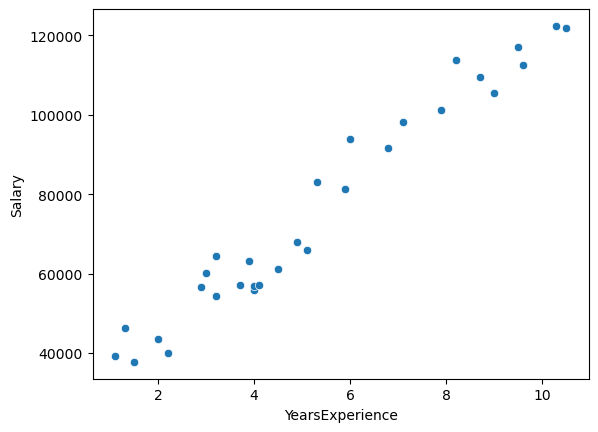

In [6]:
sns.scatterplot(data['YearsExperience'],data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

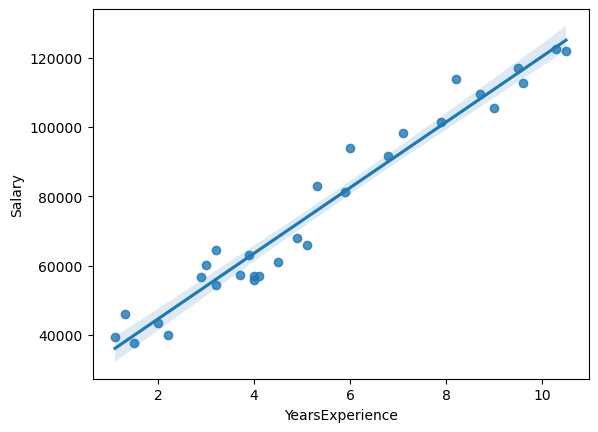

In [7]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [8]:
#Correlation Anaylis
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

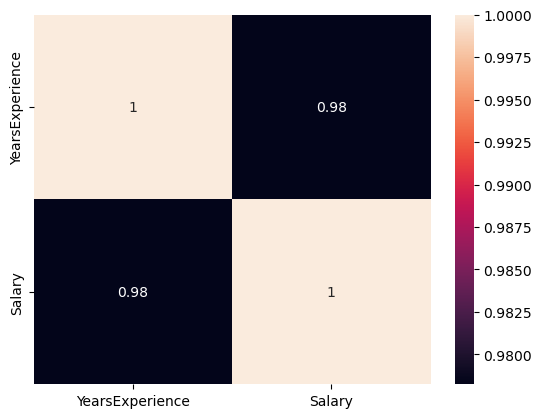

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
#model creation
model = smf.ols('Salary~YearsExperience',data=data).fit()

In [11]:
#Model parameters
#intercept = c
#years= m
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
#checking p value 
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [13]:
#r2 value
model.rsquared

0.9569566641435086

In [14]:
Scaler = StandardScaler()

data_scaled = pd.DataFrame(Scaler.fit_transform(data),columns = data.columns)

In [15]:
data_scaled

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


In [16]:
modelS = smf.ols('Salary~YearsExperience',data=data_scaled).fit()

In [17]:
#Model parameters
modelS.params

Intercept         -2.775558e-17
YearsExperience    9.782416e-01
dtype: float64

In [18]:
#checking p value 
modelS.pvalues

Intercept          1.000000e+00
YearsExperience    1.143068e-20
dtype: float64

In [19]:
#r2 value
modelS.rsquared

0.9569566641435086

In [20]:
#Prediction for new data
new_data=pd.DataFrame({'YearsExperience':(6.5,7.5,11,12,15)})
new_data

,YearsExperience
0,6.5
1,7.5
2,11.0
3,12.0
4,15.0


In [21]:
model.predict(new_data)

0     87216.955288
1     96666.917610
2    129741.785735
3    139191.748056
4    167541.635020
dtype: float64